In [1]:
#!/usr/bin/env python3

In [2]:
# import librarys
import json
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
from urllib.parse import urlsplit

In [3]:
# generic store data to file function
def store_data(data, file, mode='w', toJson=False):
    if toJson:
        data = json.dumps(data)
    with open(file, mode, encoding='utf-8') as fp:
        result = fp.write(data)
        return result
    
# generic load data from file function
def load_data(file, fromJson=False):
    if os.path.isfile(file):
        with open(file, 'r', encoding='utf-8', errors="ignore") as fp:
            data = fp.read()
            if fromJson:
                data = json.loads(data)
            return data
    else:
        return 'file not found'

# test text
#print(store_data('Hello', '../data/repositories/mlart/test.txt'))
#print(load_data('../data/repositories/mlart/test.txt'))

# test json
#print(store_data({'msg':'Hello World'}, '../data/repositories/mlart/test.json', toJson=True))
#print(load_data('../data/repositories/mlart/test.json', fromJson=True))

#store_data(result[0]['html'], '../data/repositories/kaggle/notebook.html')
#store_data(result[0]['iframe'], '../data/repositories/kaggle/kernel.html')

In [23]:
# read in all json files

folder = '../data/database/json/'
subfolder = os.listdir(folder)
#print(subfolder)

df = pd.DataFrame()

quit = 0
i = 0
for item in subfolder:
    fp = os.path.join(folder, item)
    if os.path.isdir(fp):
        print('###')
        print('files:', item)
        files = os.listdir(fp)
        print(len(files))
        for file in files:
            data = load_data(os.path.join(folder, item, file), fromJson=True)
            #print(data)
            df = df.append(data, ignore_index=True)
            
            i += 1
            
            if i%100 == 0:
                print(i)
            
            if quit!= 0 and i >= quit:
                break
    if quit!= 0 and i >= quit:
                break
            
print(df.shape)
print(df.head())

###
bc
541
100
200
300
400
500
###
gh
433
600
700
800
900
###
ka_c
217
1000
1100
###
ka_cn
2082
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
###
ka_d
4196
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
###
ka_dn
16730
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17

In [24]:
# get shape
df.shape

(24760, 32)

In [25]:
# get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24760 entries, 0 to 24759
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   category                         1363 non-null   object 
 1   category_score                   1363 non-null   float64
 2   date_project                     24760 non-null  object 
 3   date_scraped                     20347 non-null  object 
 4   description                      24760 non-null  object 
 5   description_category             89 non-null     object 
 6   description_category_runtime     89 non-null     float64
 7   description_category_score       89 non-null     float64
 8   description_subcategory          89 non-null     object 
 9   description_subcategory_runtime  89 non-null     float64
 10  description_subcategory_score    89 non-null     float64
 11  host                             24760 non-null  object 
 12  kind              

In [194]:
# diagram function
def chart_feature(feature, x=10, y=8, label=None, legend=1, columns=1, stacked=True, save=False, sort_index=False, df=df, truncate_start=0, truncate=0, colormap='Spectral'):
    if sort_index == True:
        n = df[feature].value_counts().sort_index()
    else:
        n = df[feature].value_counts()
    
    if truncate != 0:
        n = n[0:truncate]
    if truncate_start != 0:
        n = n[truncate_start:]
    if label == None:
        label = feature
    
    df2=pd.DataFrame([n], index=[''])
    
    # https://stackoverflow.com/questions/11927715/how-to-give-a-pandas-matplotlib-bar-graph-custom-colors
    # http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps
    
    ax = df2.plot(kind='bar', stacked=stacked, figsize=(x,y), title=label, colormap=colormap)
    
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines[:], labels[::legend], loc='best', ncol=columns)
    fig = ax.get_figure()
    if save == True:
        fig.savefig(feature + '.png')

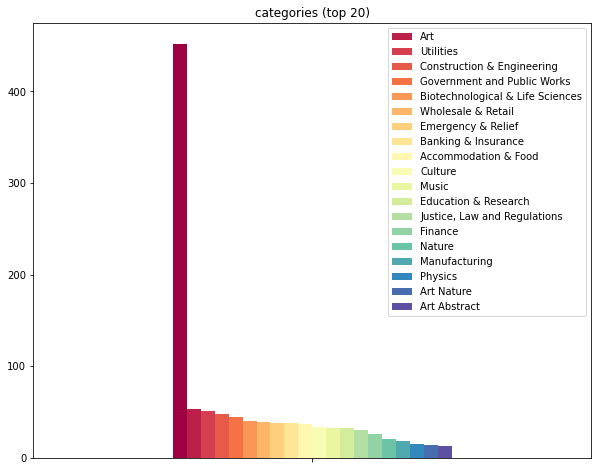

In [195]:
df['category_list'] = [' '.join(x) if isinstance(x, list) else x for x in df['category']]
chart_feature('category_list', stacked=False, sort_index=False, truncate=20, label='categories (top 20)')

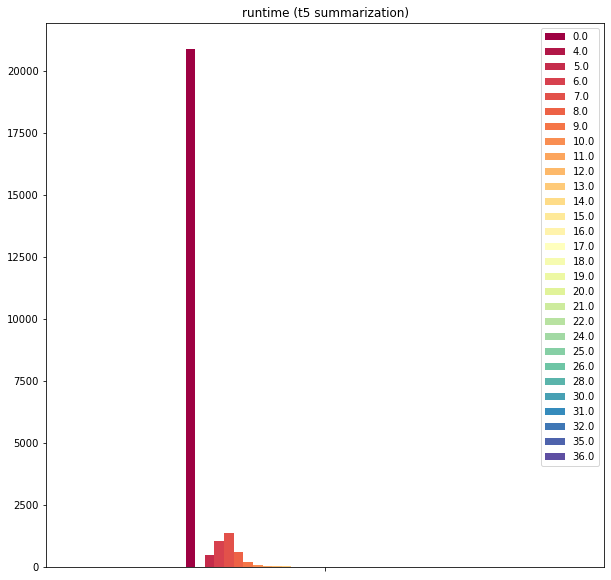

In [105]:
steps = 1
# df['runtime_round'] = [round(x+y/steps,0)*steps for x in df['runtime'] for y in df['runtime_cat']]
df['runtime_round'] = [round(x/steps,0)*steps for x in df['runtime']]
chart_feature('runtime_round', stacked=False, sort_index=True, truncate_start=0, label='runtime (t5 summarization)')

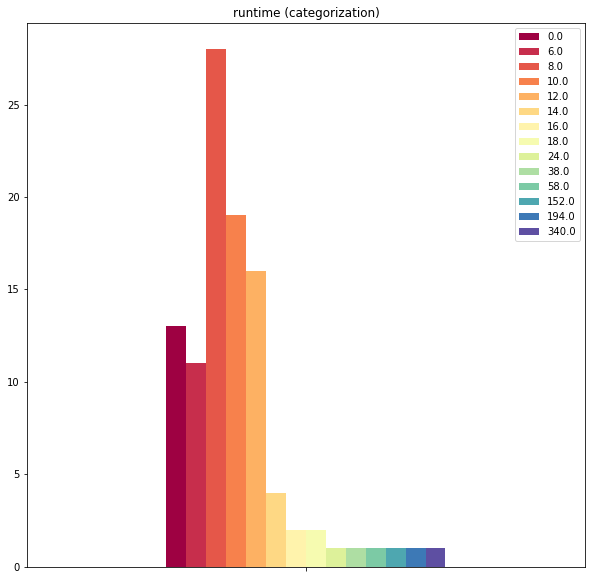

In [106]:
steps = 2
# df['runtime_round'] = [round(x+y/steps,0)*steps for x in df['runtime'] for y in df['runtime_cat']]
df['runtime_cat_round'] = [round(x/steps,0)*steps for x in df['runtime_cat']]
chart_feature('runtime_cat_round', stacked=False, sort_index=True, label='runtime (categorization)')

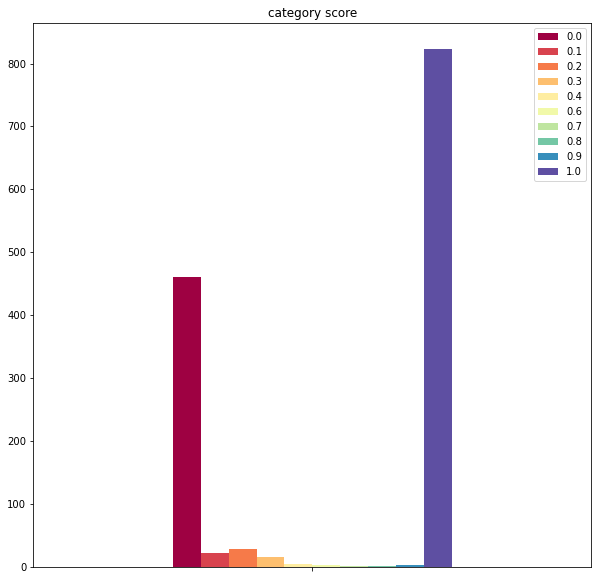

In [107]:
df['category_score_round'] = [round(x,1) for x in df['category_score']]
chart_feature('category_score_round', stacked=False, sort_index=True, label='category score')

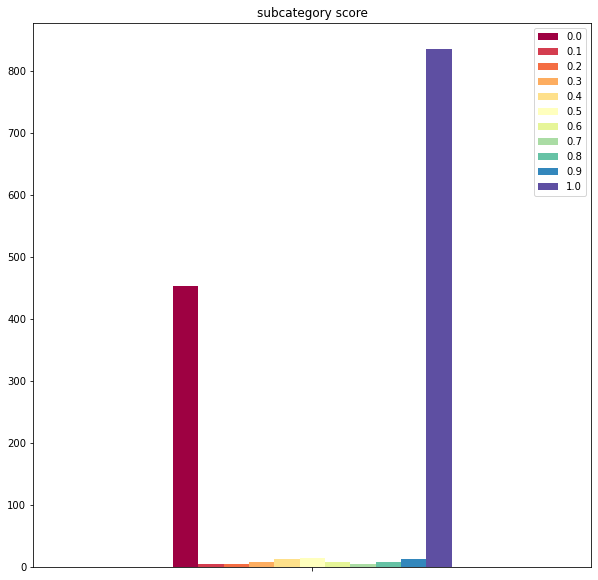

In [108]:
df['subcategory_score_round'] = [round(x,1) for x in df['subcategory_score']]
chart_feature('subcategory_score_round', stacked=False, sort_index=True, label='subcategory score')

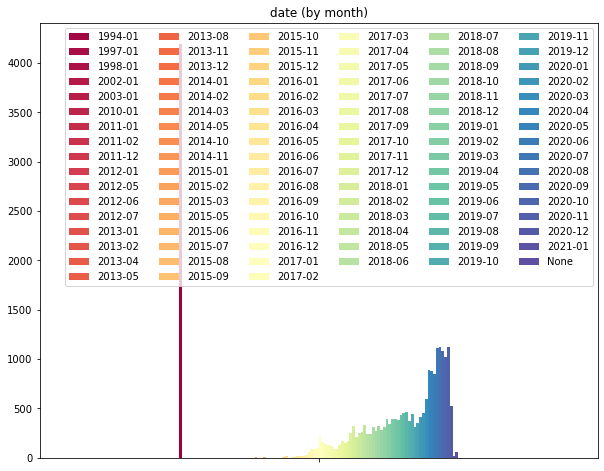

In [171]:
df['date_round'] = ['-'.join((x.split('-'))[0:2]) for x in df['date_project']]
chart_feature('date_round', stacked=False, sort_index=True, label='date (by month)', legend=1, columns=6)

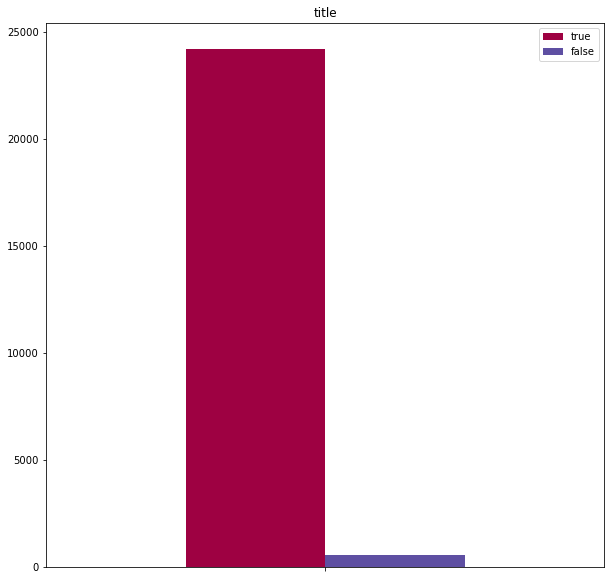

In [110]:
df['title_flat'] = ['false' if x == '' else 'true' for x in df['title']]
chart_feature('title_flat', stacked=False, label='title') #, colormap='RdYlBu'

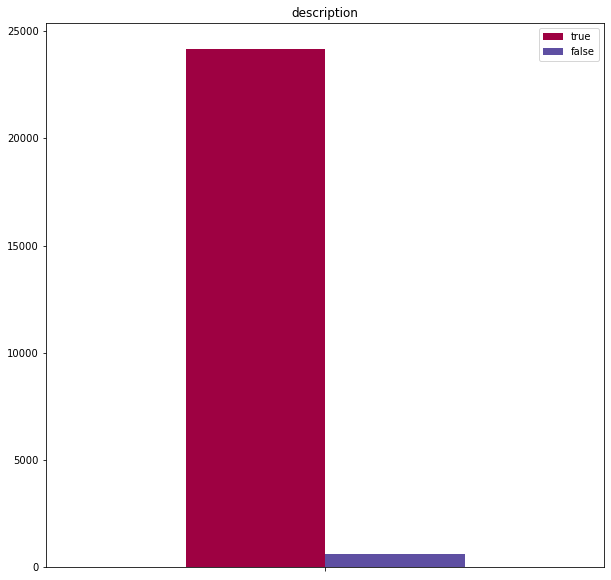

In [111]:
df['description_flat'] = ['false' if x == '' else 'true' for x in df['description']]
chart_feature('description_flat', stacked=False, label='description')

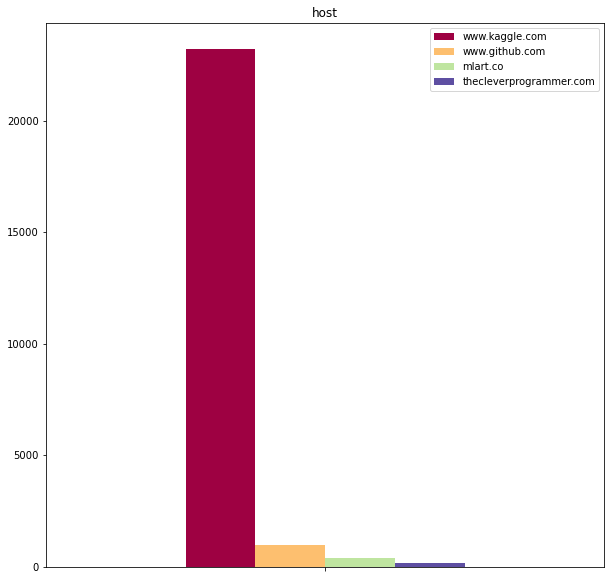

In [36]:
chart_feature('host', stacked=False)

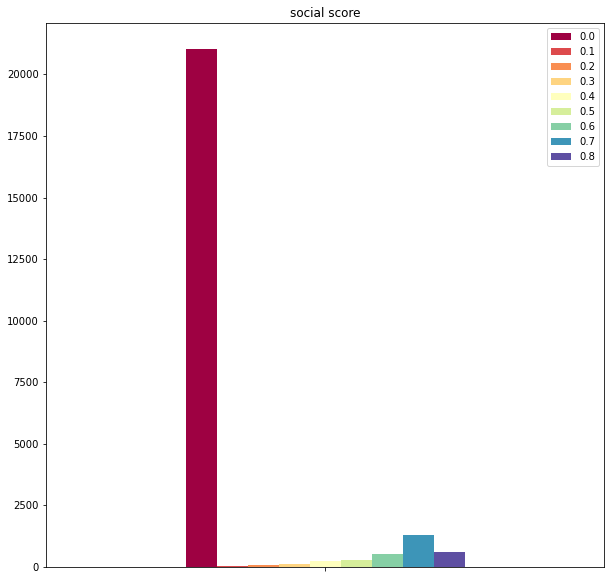

In [112]:
df['score_round'] = [round(float(x),1) if x != None else 0 for x in df['score']]
chart_feature('score_round', stacked=False, sort_index=True, label='social score')

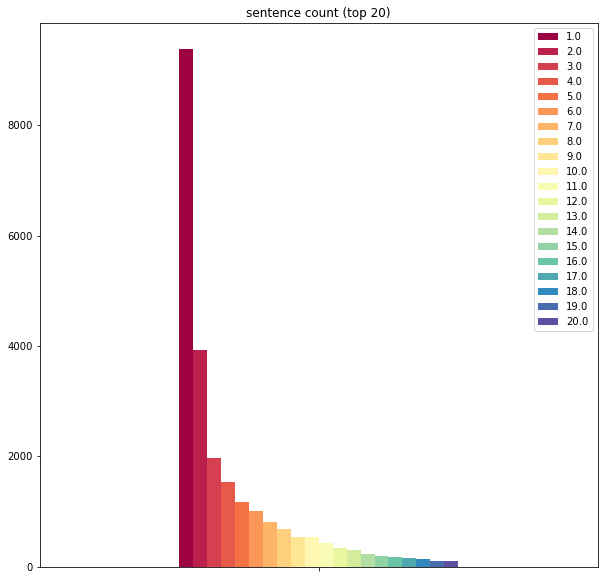

In [122]:
steps = 1
df['sentences_round'] = [round(x/steps,0)*steps for x in df['sentences']]
chart_feature('sentences_round', stacked=False, sort_index=True, label='sentence count (top 20)', truncate=20)

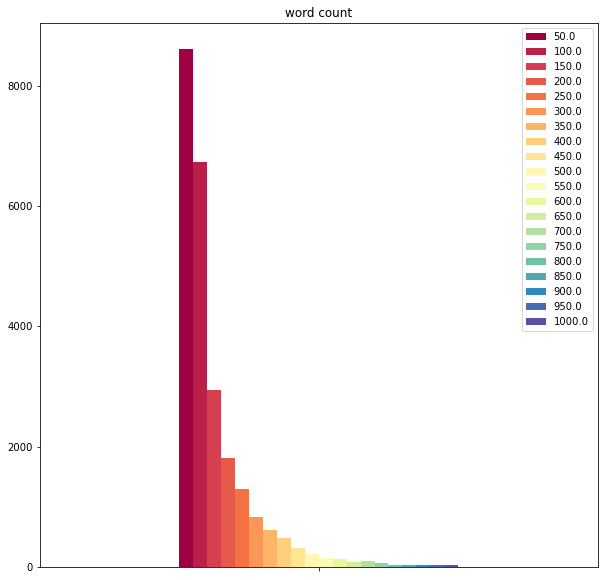

In [123]:
steps = 50
df['words_round'] = [round(x/steps,0)*steps+steps for x in df['words']]
chart_feature('words_round', stacked=False, sort_index=True, truncate=1000, label='word count (top 20)')

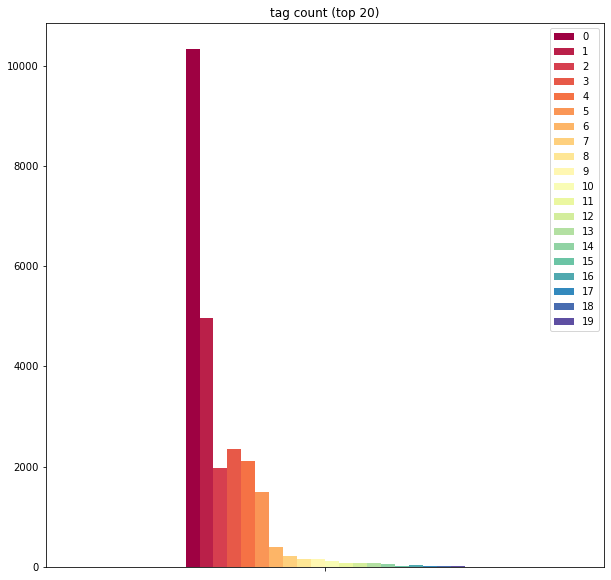

In [124]:
df['tags_count'] = [len(x) for x in df['tags']]
chart_feature('tags_count', stacked=False, sort_index=True, label='tag count (top 20)', truncate=20)

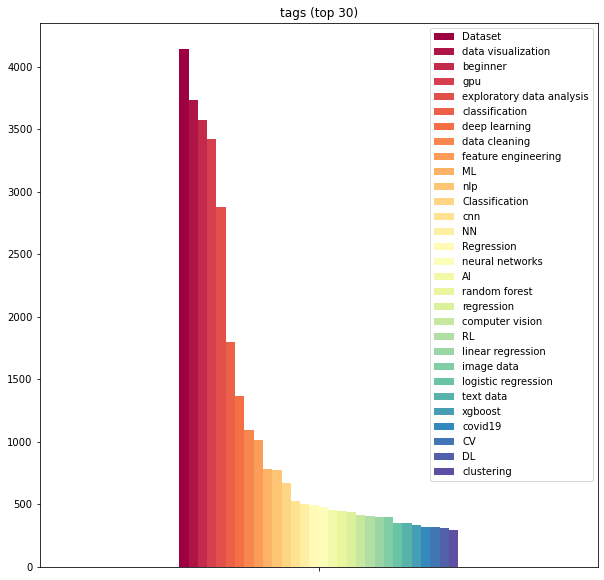

In [125]:
tags = []
for item in df['tags']:
    tags.extend(item)
    
df2 = pd.DataFrame(tags)
chart_feature(0, stacked=False, sort_index=False, df=df2, truncate=30, label='tags (top 30)')

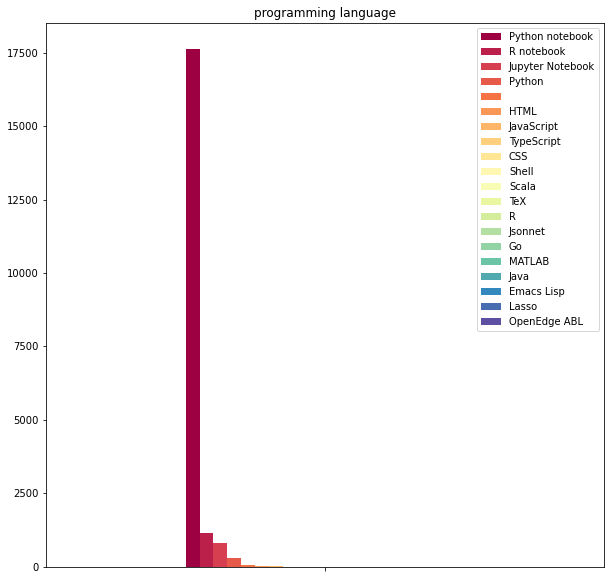

In [126]:
chart_feature('language', stacked=False, label='programming language')

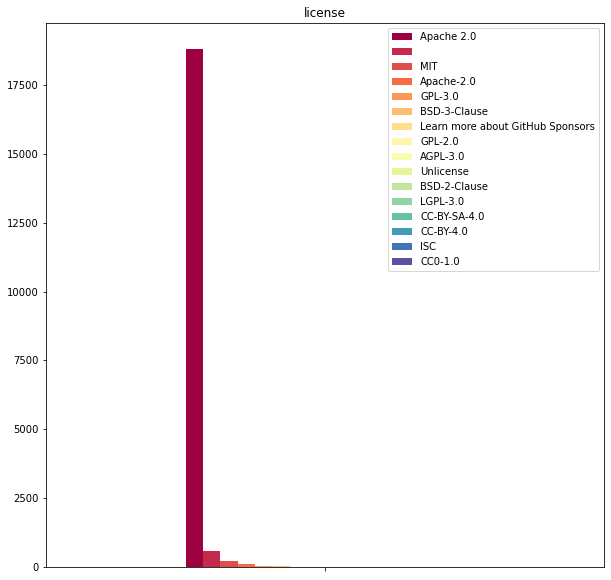

In [47]:
chart_feature('license', stacked=False)

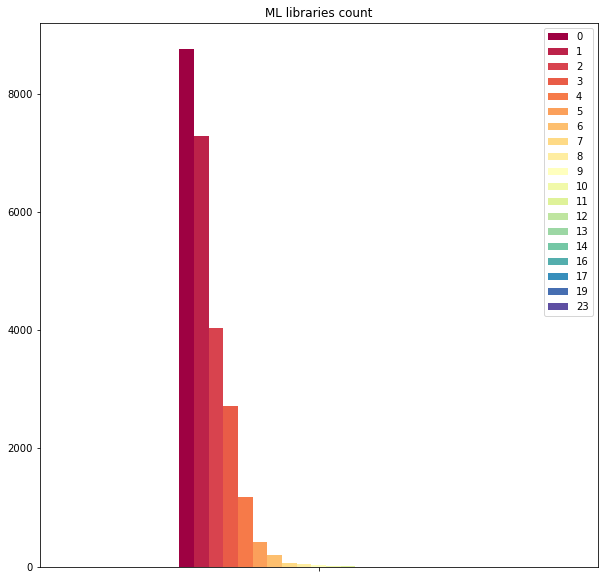

In [129]:
df['ml_libs_count'] = [len(x) if isinstance(x, list) else 0 for x in df['ml_libs']]
chart_feature('ml_libs_count', stacked=False, sort_index=True, label='ML libraries count')

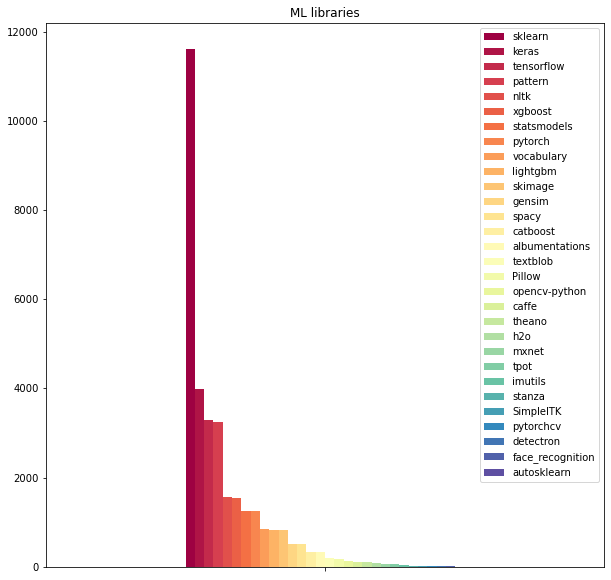

In [130]:
ml_libs = []
for item in df['ml_libs']:
    if isinstance(item, list):
        ml_libs.extend(item)
    
df2 = pd.DataFrame(ml_libs)
chart_feature(0, stacked=False, sort_index=False, df=df2, truncate=30, label='ML libraries')

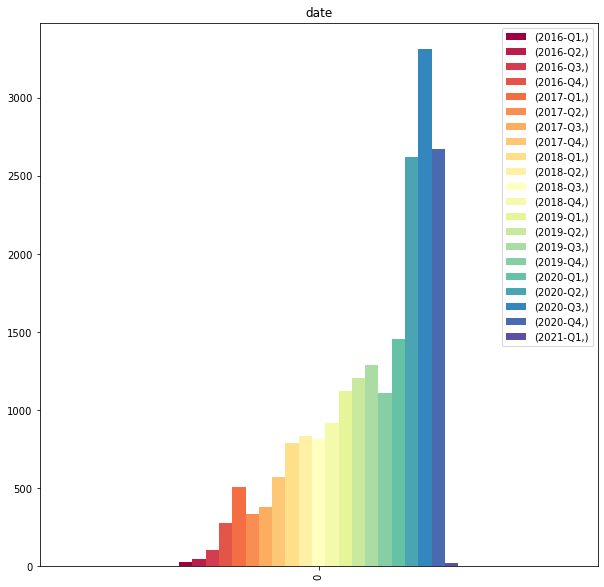

In [131]:
import math

# diagram activity
def chart_activity(feature, truncate=0, truncate_start=0, label=None):
    data = []

    for item in df[feature]:
        if isinstance(item, str) and item!='':
            parts = item.split('-')
            #print(parts)
            if len(parts) == 3:
                quarter = math.ceil(int(parts[1]) / 3)
                data.append(parts[0]+'-Q'+str(quarter))
    
    df2 = pd.DataFrame(data)
    
    n = df2.value_counts(sort = False)
    n = pd.Series(n.index.values, index=n)
    n = n.sort_values(ascending = True)
    n = pd.Series(n.index.values, index=n)
    
    if truncate!=0:
        n = n[0:truncate]
        
    if truncate_start!=0:
        n = n[truncate_start:]
        
    if label == None:
        label = feature
    
    df2=pd.DataFrame([n])
    ax = df2.plot(kind='bar', stacked=False, figsize=(10,10), title=label, colormap='Spectral')
    fig = ax.get_figure()
    #fig.savefig(feature + '.png')
    
#print(df.head)
chart_activity('date_project', truncate_start=22, label='date')